In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json

# Gen data by distortion

In [11]:
def plot_color_distribution(L : np.ndarray):
    L2 = L.copy()
    import colorsys
    for i in range(10000):
        r,g,b = L[i]
        L2[i] = colorsys.rgb_to_hsv(r,g,b)
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.scatter(L2[:,0] * 2 * np.pi, L2[:, 1], color=L, alpha=0.3, s=5)
    ax.set_rticks([])

    ax.set_title("Color distribution")
    plt.show()

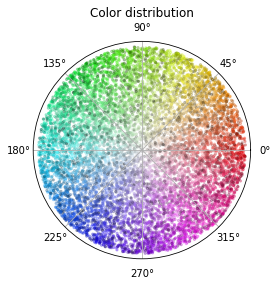

In [12]:
# Random 10000 illuminant
np.random.seed(0)
L = np.random.rand(10000, 3)
plot_color_distribution(L)

In [13]:
# Assign each illuminant to an image, save to training and testing data

img_dir = 'datasets/five_k_expert_a_small/images'
img_fn = os.listdir(img_dir)
img_fn = img_fn * 2

image_name_to_illuminant = []
for i in range(10000):
    image_name_to_illuminant.append([img_fn[i], L[i].tolist()])

train_data = []
test_data = []

train_idx = np.random.choice(10000, 8000, replace=False)
for i in range(10000):
    if i in train_idx:
        train_data.append(image_name_to_illuminant[i])
    else:
        test_data.append(image_name_to_illuminant[i])

with open("datasets/five_k_expert_a_small/train_data.json", mode='w') as f:
    json.dump(train_data, f, indent=4)
with open("datasets/five_k_expert_a_small/test_data.json", mode='w') as f:
    json.dump(test_data, f, indent=4)

print("Done")

Done
